In [2]:
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup 

# importing for exceptions
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [131]:
driver = webdriver.Chrome(executable_path = 'C:\chromedriver_win32 (2)\chromedriver.exe')
wait = WebDriverWait(driver,10)

In [132]:
def login():
    driver.get('https://www.instagram.com/')
    time.sleep(3)
    username_textbox= wait.until(EC.presence_of_element_located((By.NAME,'username')))
    username_textbox.send_keys(username)
    
    password_textbox=driver.find_element_by_name('password')
    password_textbox.send_keys(password)
    
    login_button=driver.find_element_by_class_name('L3NKy')
    login_button.click()
    time.sleep(3)
    
    # save your login info popup
    a=driver.find_element_by_class_name('yWX7d')
    a.click()
    
    #turn of notification popup
    driver.find_element_by_xpath('//button[contains(@class,"aOOlW   HoLwm ")]').click()
    time.sleep(2)

In [7]:
login()

In [5]:
def text_box(search_this):
    text_box = driver.find_element_by_class_name('x3qfX') # finding text box using its class
    text_box.clear() # clearing it so that if some other thing is written in it then it is removed first
    text_box.send_keys(search_this)

In [6]:
def searchprofile(profile_name):
    text_box(profile_name)
    time.sleep(3)
    driver.find_element_by_class_name('-qQT3').click()

In [67]:
text_box('food')

# From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [272]:
a=[]
def username():
    text_box('food')
    time.sleep(3)
    lis=driver.find_elements_by_class_name('-qQT3')
    instahandles=[]
    
    for i in lis:
        if ('locations' not in i.get_attribute('href')) and ('tags' not in i.get_attribute('href')):
                    instahandles.append(i)

    for j in instahandles:
        a.append(j.find_element_by_class_name('_7UhW9').text)
    


In [174]:
#calling function
username()
a.remove('food')

In [179]:
# for top 10 handles
a=a[:10]

# From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [269]:
followers_count=[]
def followerscount():
    for i in a:
        try:
            searchprofile(i)
            time.sleep(3)
            followers=wait.until(EC.presence_of_element_located((By.XPATH,'//a[@class="-nal3 "]/span[@class="g47SY "]')))
            f=followers.get_attribute('title')
            if "," in f:
                f=f.replace(",","")
                followers_count.append(int(f))
            else:
                followers_count.append(int(f))
        except TimeoutException:
            pass

In [270]:
#calling function
followerscount()

In [251]:
#top 10 handles with followers
for i in range(10):
    print(a[i],'-',followers_count[i],'followers')

foodtalkindia - 306314 followers
foodie_incarnate - 742641 followers
dilsefoodie - 859444 followers
foodie_riza - 190 followers
the.food_cult - 90209 followers
yourfoodlab - 1802476 followers
food_lunatic - 118968 followers
food.babyy_ - 24895 followers
delhi_streets_food - 30840 followers
tasty.foodrecipes - 5295 followers


In [255]:
y={}
for key in a:
    for value in followers_count:
        y[key]=value
        followers_count.remove(value)
        break

In [256]:
y

{'foodtalkindia': 306314,
 'foodie_incarnate': 742641,
 'dilsefoodie': 859444,
 'foodie_riza': 190,
 'the.food_cult': 90209,
 'yourfoodlab': 1802476,
 'food_lunatic': 118968,
 'food.babyy_': 24895,
 'delhi_streets_food': 30840,
 'tasty.foodrecipes': 5295}

In [257]:
#sort y
sort_y=sorted(y.items(),key=lambda kv:kv[1],reverse=True)[:5]

In [266]:
# TOP 5 highest no. of followers
print('Top 5 Usernames with highest number of followers:')
top5=[] # for top 5 handles
top5follow=[]
for i in sort_y:
    print(i[0],"-",i[1])
    top5.append(i[0])
    top5follow.append(i[1])


Top 5 Usernames with highest number of followers:
yourfoodlab - 1802476
dilsefoodie - 859444
foodie_incarnate - 742641
foodtalkindia - 306314
food_lunatic - 118968


In [273]:
top5

['yourfoodlab',
 'dilsefoodie',
 'foodie_incarnate',
 'foodtalkindia',
 'food_lunatic']

# Now Find the number of posts these handles have done in the previous 3 days.

In [310]:
def posts():
    for i in top5:
        searchprofile(i)
        time.sleep(4)
        post_data = driver.find_elements_by_xpath('//a/div[@class="eLAPa"]')
        count=0
        for j in post_data:
            j.click()
            wait.until(EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "Nzb55")]')))
            timer=driver.find_element_by_xpath('//a/time[contains(@class,"_1o9PC")]')
            time_string=timer.text
            if "HOURS" in time_string or "HOUR" in time_string:
                count+=1
            elif "MINUTES" in time_string or "MINUTE" in time_string:
                count+=1
            elif time_string=="1 DAY AGO":
                count+=1
            elif time_string=="2 DAYS AGO":
                count+=1
            elif time_string=="3 DAYS AGO":
                count+=1
            else:
                driver.find_element_by_xpath('/html/body/div[6]/div[3]/button').click()
                break
            time.sleep(3)
            driver.find_element_by_xpath('/html/body/div[6]/div[3]/button').click()
            time.sleep(5)
        print(i, "have done", count, "posts in past 3 days")
#calling function
posts()

yourfoodlab have done 5 posts in past 3 days
dilsefoodie have done 6 posts in past 3 days
foodie_incarnate have done 6 posts in past 3 days
foodtalkindia have done 6 posts in past 3 days
food_lunatic have done 6 posts in past 3 days


In [311]:
Noofposts=[5,6,6,6,6]

# Depict this information using a suitable graph.

<ipython-input-320-4135ac250a51>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(top5,top5follow,color='rgbkymc')


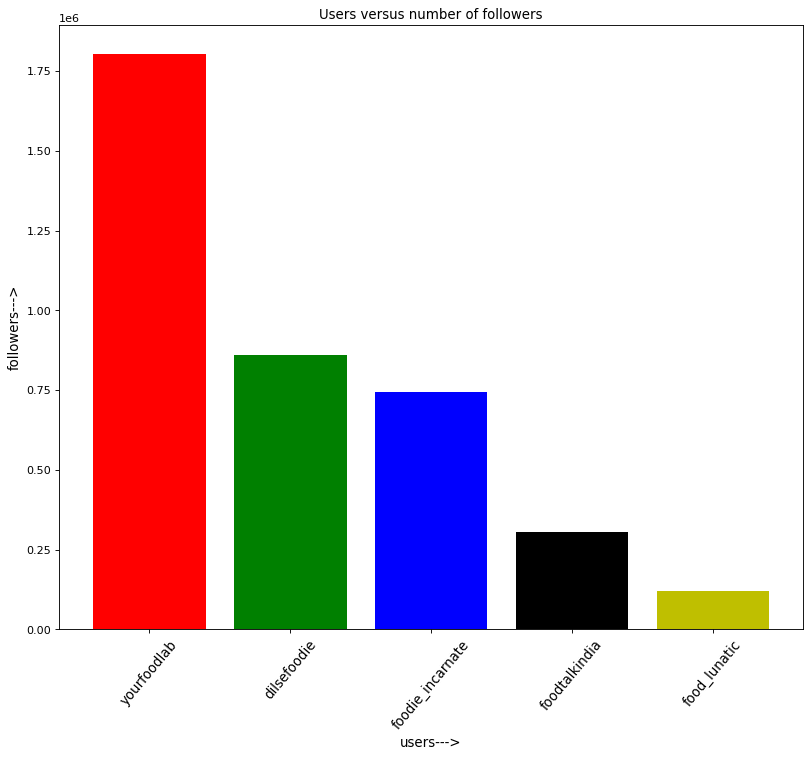

In [320]:
#plotting a graph between those 10 users and the number of followers
plt.figure(num=None, figsize=(12, 10), dpi=80, edgecolor='k')
plt.xticks(rotation=50, size=12)
plt.bar(top5,top5follow,color='rgbkymc')
plt.title('Users versus number of followers', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('followers--->', size=12)
#plt.grid()
plt.show()

<ipython-input-329-51f72fc30844>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(top5,Noofposts,color='rgbkymc')


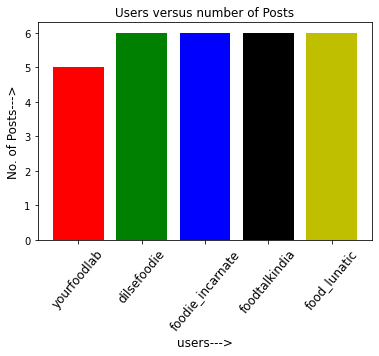

In [329]:
#graph between top 5 users and the number of posts
plt.xticks(rotation=50, size=12)
plt.bar(top5,Noofposts,color='rgbkymc')
plt.title('Users versus number of Posts', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('No. of Posts--->', size=12)
#plt.grid()
plt.show()

# Your friend also needs a list of hashtags that he should use in his posts ,open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [32]:
data=[]
def getcontent():
    for i in top5:
        searchprofile(i)
        time.sleep(3)
        post_data=driver.find_elements_by_xpath('//a/div[@class="eLAPa"]')
        for j in range(10):
            post_data[j].click()
            
            try:
                wait.until(EC.presence_of_element_located((By.XPATH, '//a[contains(@class, " xil3i")]')))
                test_data=driver.find_elements_by_xpath('//a[contains(@class, " xil3i")]')
                for k in test_data:
                        print(k.text)
                        data.append(k.text)
            except TimeoutException:
                pass
            time.sleep(3)
            #cross button
            driver.find_element_by_xpath('/html/body/div[6]/div[3]/button').click()
            time.sleep(3)

In [37]:
getcontent()

#recipe
#foodie
#indiancuisine
#streetfood
#mumbaifoodie
#shawarma
#shawarmalovers
#shawarmas
#paneer
#paneerrecipes
#paneerlove
#sanjyotkeer
#yourfoodlab
#recipe
#foodie
#samosa
#foodporn
#samosalover
#foodstylist
#monsoon
#monsoonseason
#mood
#foodpic
#onionsamosa
#sanjyotkeer
#yourfoodlab
#instafood
#instagram
#recipe
#foodie
#samosa
#foodporn
#samosalover
#foodstylist
#monsoon
#monsoonseason
#mood
#foodpic
#indiancuisine
#onionsamosa
#sanjyotkeer
#yourfoodlab
#instafood
#recipe
#foodie
#resturant
#kofta
#malaikofta
#streetfood
#indiancuisine
#foodporn
#sanjyotkeer
#streetfoodindia
#streetfood
#indianfood
#mumbai
#mumbaifoodie
#homemade
#recipe
#MaaKiDal
#dal
#foodporn
#promo
#promovideo
#homemade
#homemadefood
#resturant
#foodpics
#foodlover
#sanjyotkeer
#yourfoodlab
#YFL
#YourFoodLab
#ChefSanjyotKeer
#HealthyRecipes
#home
#homemade
#streetfood
#mumbaistreetfood
#recipe
#foodie
#resturant
#kofta
#malaikofta
#streetfood
#indiancuisine
#foodporn
#sanjyotkeer
#streetfoodindia
#streetf

In [87]:
len(data)

878

# Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [41]:
#creating a dict to get exact word count
y={}
for i in data:
    y[i]=y.get(i,0)+1
    

In [42]:
y

{'#recipe': 10,
 '#foodie': 12,
 '#indiancuisine': 8,
 '#streetfood': 17,
 '#mumbaifoodie': 8,
 '#shawarma': 2,
 '#shawarmalovers': 2,
 '#shawarmas': 2,
 '#paneer': 3,
 '#paneerrecipes': 2,
 '#paneerlove': 2,
 '#sanjyotkeer': 10,
 '#yourfoodlab': 8,
 '#HotFind': 2,
 '#Rolls': 4,
 '#foodtalkindia': 15,
 '#foodtalk': 9,
 '#fti': 2,
 '#food': 8,
 '#foodies': 5,
 '#rolls': 4,
 '#kathiroll': 2,
 '#wraps': 4,
 '#frankie': 4,
 '#kebab': 4,
 '#mumbaifoodies': 2,
 '#foodporn': 19,
 '#goodfood': 4,
 '#delicious': 5,
 '#yummy': 4,
 '#chickenroll': 2,
 '#NewInTown': 4,
 '#drinks': 2,
 '#whiskey': 2,
 '#whisky': 2,
 '#alcohol': 2,
 '#whiskeylover': 2,
 '#cocktails': 2,
 '#whiskeysour': 2,
 '#foodiesofinstagram': 9,
 '#drinking': 2,
 '#LetsTalk': 2,
 '#kathirolls': 2,
 '#letstalk': 2,
 '#foodinsta': 2,
 '#landuree': 2,
 '#newintown': 2,
 '#delhi': 18,
 '#delhifoodie': 10,
 '#bakery': 2,
 '#macrons': 2,
 '#pastry': 2,
 '#cookies': 2,
 '#luxurylifestyle': 2,
 '#RecentWork': 6,
 '#JohnnieWalker': 6,
 '

# Create a csv file with two columns : the word and its frequency

In [54]:
#creating a csv file
freq=[]
word=[]
for key,values in y.items():
    word.append(key)
    freq.append(values)
freq=np.array(freq)
wrds=np.array(word)
df=pd.DataFrame()
df['word']=wrds
df['Frequency']=freq
df.to_csv('Hashtags_Frequency.csv')

In [55]:
df

,word,Frequency
0,#recipe,10
1,#foodie,12
2,#indiancuisine,8
3,#streetfood,17
4,#mumbaifoodie,8
...,...,...
265,#huge,1
266,#friends,1
267,#blog,1
268,#bff,1


In [56]:
# Now, find the hashtags that were most popular among these bloggers#

# Now, find the hashtags that were most popular among these bloggers

In [61]:
df1=df.sort_values(by='Frequency',ascending=False)
df1 = df1.reset_index()

In [62]:
df1
#'#foodporn' was most famous among these bloggers

,index,word,Frequency
0,26,#foodporn,19
1,47,#delhi,18
2,3,#streetfood,17
3,106,#foodblogger,16
4,101,#delhifoodblogger,16
...,...,...,...
265,168,#kolkatafoodie,1
266,169,#hindu,1
267,170,#sutta,1
268,171,#gulabjamun,1


In [66]:
#Top 5 hastags
df1=df1[0:5]
df1

,index,word,Frequency
0,26,#foodporn,19
1,47,#delhi,18
2,3,#streetfood,17
3,106,#foodblogger,16
4,101,#delhifoodblogger,16


# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [72]:
#plotting a piechart
words=[]
freq=[]
for i in df1.index:
    words.append(df1['word'][i])
    freq.append(df1['Frequency'][i])

In [73]:
words

['#foodporn', '#delhi', '#streetfood', '#foodblogger', '#delhifoodblogger']

In [74]:
freq

[19, 18, 17, 16, 16]

<Figure size 800x640 with 0 Axes>

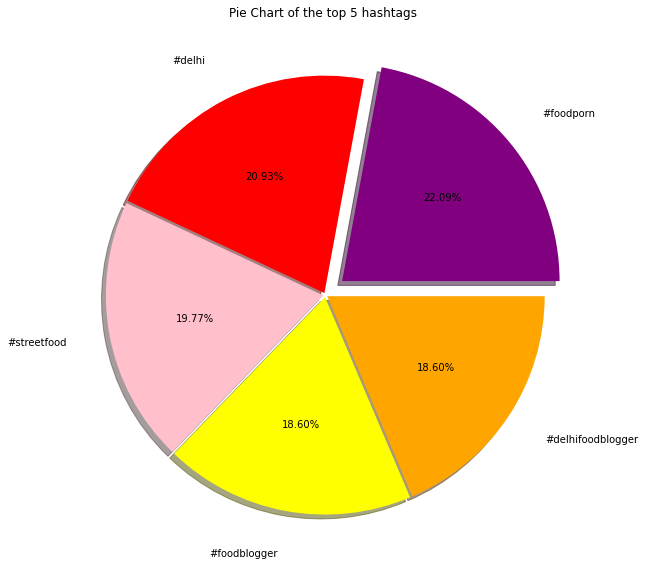

In [85]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='gray', edgecolor='k')
plt.figure(figsize=(10, 10))
explode=[0.1,0.01,0.01,0.01,0.01,]
color=['purple','red','pink','yellow','orange']
plt.pie(freq, labels=words,colors=color, autopct='%.2f%%',shadow=True, labeldistance=1.2,explode=explode)
plt.title('Pie Chart of the top 5 hashtags ')
plt.show()

In [8]:
top5=['yourfoodlab','dilsefoodie','foodie_incarnate','foodtalkindia','food_lunatic']

# You need to also calculate average followers : likes ratio for the obtained handles.

In [72]:

        searchprofile('yourfoodlab')
        time.sleep(3)
        post_data=driver.find_elements_by_xpath('//a/div[@class="eLAPa"]')
        for j in range(4):
            post_data[j].click()
            try:
                a=driver.find_element_by_class_name('vcOH2')
                if 'views' in a.text:
                    a.click()
                    time.sleep(3)
                    c=driver.find_element_by_class_name('vJRqr')
                    print(c.text)
                    time.sleep(3)
                    driver.find_element_by_class_name('QhbhU').click()
                    driver.find_element_by_xpath('/html/body/div[6]/div[3]/button').click()
                    time.sleep(3)
            except NoSuchElementException:
                time.sleep(3)
                likes=driver.find_element_by_class_name('zV_Nj')
                time.sleep(3)
                print(likes.text)
                driver.find_element_by_xpath('/html/body/div[6]/div[3]/button').click()
                time.sleep(3)
                
                
                
                
                
            
            

7,414 likes
37,771 likes
46,330 likes
38,323 likes


In [129]:
like_count=[]
def Likecount():
    for i in top5:
        searchprofile(i)
        time.sleep(3)
        post_data=driver.find_elements_by_xpath('//a/div[@class="eLAPa"]')
        count=0
        post_count = 0
        print(i)
        print('post_data', len(post_data))
        for j in range(10):
            post_count += 1
            post_data[j].click()
            try:
                time.sleep(3)
                a=driver.find_element_by_class_name('vcOH2')
                time.sleep(10)
                a.click()
                time.sleep(3)
                likes=driver.find_element_by_class_name('vJRqr')
                Video_like = int(likes.text.replace(',','').strip().split(' ')[0])
                print(post_count, ': number of likes on video', Video_like)
                count += Video_like
                time.sleep(3)
                driver.find_element_by_class_name('QhbhU').click()
                time.sleep(3)
                driver.find_element_by_xpath('/html/body/div[6]/div[3]/button').click()
                time.sleep(3)
                
            except NoSuchElementException:
                time.sleep(3)
                likes=driver.find_element_by_class_name('zV_Nj')
                time.sleep(3)
                image_likes = int(likes.text.replace(',','').strip().split(' ')[0])
                print(post_count, ': number of likes on image', image_likes)
                count += image_likes
                time.sleep(3)
                driver.find_element_by_xpath('/html/body/div[6]/div[3]/button').click()
                time.sleep(3)
        print(i, 'has total counts', count, 'on first 10 posts')
        like_count.append(count)     

In [134]:
#calling Function
Likecount()

yourfoodlab
post_data 24
1 : number of likes on video 7896
2 : number of likes on image 38547
3 : number of likes on video 47185
4 : number of likes on image 38328
5 : number of likes on video 14457
6 : number of likes on video 26771
7 : number of likes on video 31316
8 : number of likes on image 19981
9 : number of likes on video 27752
10 : number of likes on video 42517
yourfoodlab has total counts 294750 on first 10 posts
dilsefoodie
post_data 24
1 : number of likes on image 7855
2 : number of likes on image 21538
3 : number of likes on image 8079
4 : number of likes on image 7495
5 : number of likes on image 26046
6 : number of likes on image 15542
7 : number of likes on image 21251
8 : number of likes on image 357790
9 : number of likes on image 98646
10 : number of likes on image 17182
dilsefoodie has total counts 581424 on first 10 posts
foodie_incarnate
post_data 24
1 : number of likes on image 17587
2 : number of likes on image 22560
3 : number of likes on video 67484
4 : numb

In [138]:
like_count

[294750, 581424, 500280, 8381, 16241]

In [147]:
npfollowers=np.array(top5follow)
print(npfollowers)
nplikes=np.array(like_count)
print(nplikes)

[1802476  859444  742641  306314  118968]
[294750 581424 500280   8381  16241]


# Calculate the average likes for a handle.

In [148]:
averagelikes=nplikes/10
averagelikes

array([29475. , 58142.4, 50028. ,   838.1,  1624.1])

# Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.¶

In [150]:
#for getting average followers to likes ratio
ratio=npfollowers/averagelikes
ratio

array([ 61.15270568,  14.78170836,  14.84450708, 365.48621883,
        73.25164707])

# Create a bar graph to depict the above obtained information

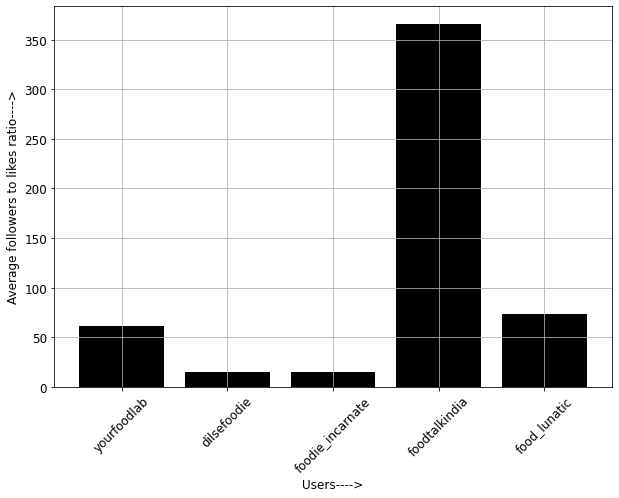

In [152]:
plt.figure(figsize=(10,7))
plt.bar(top5, ratio, color='black')
plt.xticks(rotation=45, size=12)
plt.xlabel('Users---->', size=12)
plt.ylabel('Average followers to likes ratio---->', size=12)
plt.yticks(size=12)
plt.grid()
plt.show()